In the following we plot total number of divorces over all durations per number of kids per year


In [25]:
# plot for divorces per kid per year
# code to load the dataset
import sys
import os

current_dir = os.getcwd()
src_directory = current_dir + "/../src/"
if src_directory not in sys.path:
    sys.path.append(src_directory)

import DataLoader as DL
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tueplots import bundles
from DataLoaderClass import DataLoader

plt.rcParams.update(bundles.icml2022(column="full", nrows=1, ncols=1, usetex=False))


findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


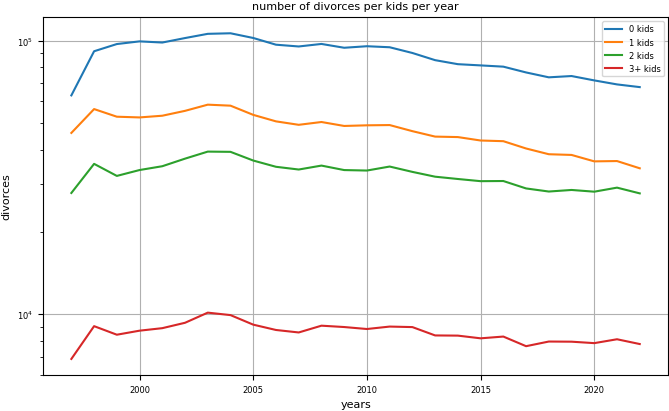

findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


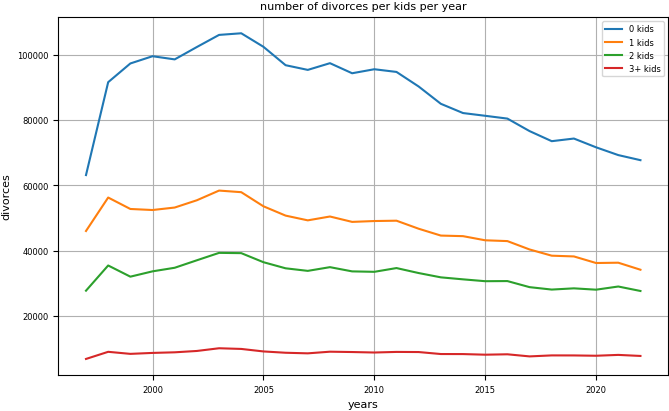

In [26]:
# load data
dataloader = DataLoader()
dataset_array, years, durations, kids = dataloader.load_data()

x_years = range(1997, 2023)

# to build the plot 
# sum on axis=1 meaning to sum over all durations per #kids and year
for kid_filtered in dataset_array.swapaxes(0, 2).sum(axis=1):
        plt.plot(x_years, kid_filtered)

# visualisation 
plt.title("number of divorces per kids per year")
plt.xlabel("years")
plt.ylabel("divorces")
plt.legend(["0 kids", "1 kids", "2 kids", "3+ kids"])
plt.grid()
# using y-axis log scale to better show changes on plot with three and more kids
plt.yscale('log')
plt.show()


# same without log scale for y-axis
for kid_filtered in dataset_array.swapaxes(0, 2).sum(axis=1):
        plt.plot(x_years, kid_filtered)

plt.title("number of divorces per kids per year")
plt.xlabel("years")
plt.ylabel("divorces")
plt.legend(["0 kids", "1 kids", "2 kids", "3+ kids"])
plt.grid()
plt.show()

findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


[ 63164.  91610.  97342.  99558.  98590. 102384. 106087. 106585. 102443.
  96808.  95372.  97427.  94343.  95572.  94748.  90284.  84989.  82157.
  81316.  80461.  76632.  73543.  74349.  71663.  69284.  67727.]
[46041. 56285. 52782. 52463. 53222. 55453. 58417. 57924. 53607. 50750.
 49298. 50476. 48827. 49089. 49194. 46731. 44637. 44459. 43192. 42948.
 40386. 38477. 38250. 36234. 36330. 34179.]
[143828. 192416. 190591. 194408. 195483. 204214. 213975. 213691. 201693.
 190928. 187072. 191948. 185817. 187027. 187640. 179147. 169833. 166199.
 163335. 162397. 153501. 148066. 149010. 143801. 142751. 137353.]


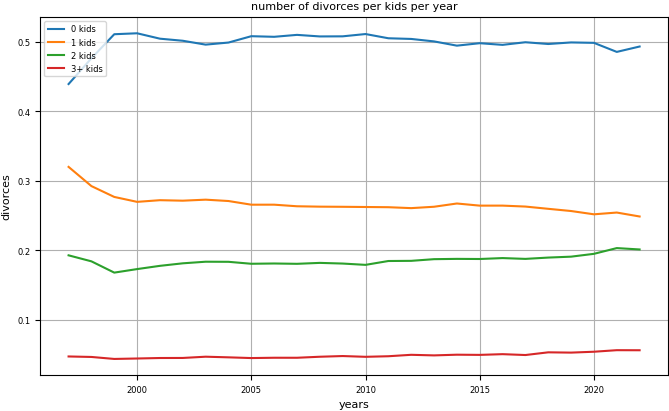

In [27]:
# to build the plot 
# sum on axis=1 meaning to sum over all durations per #kids and year
# normalise by if possible
#years = np.arange(2020,2023)
years = range(1998,2020)
num_durations = 26

def divorces_kids(kids):
    data = np.array([])
    for year in range(26):
        # Initialize sum before the loop
        sum_value = 0
        
        for duration in range(num_durations):
            # Calculate the sum along the third axis (axis=0) for each year and duration
            sum_value += np.sum(dataset_array[year][duration][kids])

        # Append the result to the data list
        data = np.append(data,sum_value.astype(int))
    return data
# Now, 'data' contains the sum of the first element along the third axis for each year


kid_0 = divorces_kids(0) 
""" kid_0 = kid_0[:-1]
kid_0 = np.delete(kid_0,np.s_[:22]) """

kid_1 = divorces_kids(1)
""" kid_1 = kid_1[:-1]
kid_1 = np.delete(kid_1,np.s_[:22]) """

kid_2 = divorces_kids(2)
""" kid_2 = kid_2[:-1]
kid_2 = np.delete(kid_2,np.s_[:22]) """

kid_3 = divorces_kids(3)
""" kid_3 = kid_3[:-1]
kid_3 = np.delete(kid_3,np.s_[:22]) """

# totale scheidungen einfach die Summe der scheidungen zwischen den Kindergruppen zu einem Zeitpunkt
# also Scheidungen pro Kind sind ja über die Durtations gebildet, wobei die Durations summiert werden
# jetzt dann die Scheidungen pro Kind noch summiert also über alle Kindergruppen
# damit eine Gesamtzahl an Scheidungen die in einem Jahr stattgefunden haben 

total_divorces = kid_0 + kid_1 + kid_2 + kid_3
print(kid_0)
print(kid_1)
print(total_divorces)

plt.plot(x_years, kid_0/total_divorces)
plt.plot(x_years, kid_1/total_divorces)
plt.plot(x_years, kid_2/total_divorces)
plt.plot(x_years, kid_3/total_divorces)


# visualisation 
plt.title("number of divorces per kids per year")
plt.xlabel("years")
plt.ylabel("divorces")
plt.legend(["0 kids", "1 kids", "2 kids", "3+ kids"])
plt.grid()
# using y-axis log scale to better show changes on plot with three and more kids
#plt.yscale('log')
plt.show()

In [28]:
# need to implement a dataloader for pairs_with_wo_kids.csv

""" import os
current_dir = os.getcwd()
csv_df = pd.read_csv(current_dir + "/dat/pairs_with_wo_kids", delimiter='\t',
                         names=["year", "duration", "0 kids", "1 kid", "2 kids", "3+ kids"], skiprows=8)[:-4]
 """

' import os\ncurrent_dir = os.getcwd()\ncsv_df = pd.read_csv(current_dir + "/dat/pairs_with_wo_kids", delimiter=\'\t\',\n                         names=["year", "duration", "0 kids", "1 kid", "2 kids", "3+ kids"], skiprows=8)[:-4]\n '

We searched for a further dataset which contains the total number of married couples splited into number of married couples with and w/o kids. The idea is to nromalize the given divorces data per kid per year by the total number of married couples with and w/o kids. 
The married couples data is given by a genesis dataset which contains datapoints from 1996 to 2019. Each has to be multiplied by a factor (unit) of 1000 to represent the accutal data. We dropped the years 1996 and 1997 to make the fit to our other dataset.

In [29]:
from io import StringIO

# Dataset of married couples in germany with and without kids per year
# after dropping the first to datapoints we copied the following lines
# which can be found in dat/pairs_with_wo_kids.csv

pairs_with_kids = "7508;7364;7264;7107;7036;6873;6729;6654;6476;6327;6132;5963;5846;5739;5699;5639;5589;5544;5697;5721;5643;5723"
pairs_wo_kids = "9406;9492;9600;9703;9748;9790;9847;9673;9681;9807;9809;9841;9854;9566;9661;9701;9702;9792;9714;9695;9815;9658"

# factor to get the acutal number of married couples
multiplication_factor = 1000

# write data into temporary csv file
temp_csv_file = StringIO()
temp_csv_file.write(pairs_with_kids)
temp_csv_file.seek(0)

# import data as NumPy-Array 
pairs_with_kids = np.fromstring(temp_csv_file.getvalue(), dtype=int, sep=';')

# to check 
print(pairs_with_kids*multiplication_factor)

# for married couples without kids
# write data into temporary csv file
temp_csv_file = StringIO()
temp_csv_file.write(pairs_wo_kids)
temp_csv_file.seek(0)

# import data as NumPy-Array 
pairs_wo_kids = np.fromstring(temp_csv_file.getvalue(), dtype=int, sep=';')

# to check
print(pairs_wo_kids*multiplication_factor)
print(len(pairs_with_kids))

[7508000 7364000 7264000 7107000 7036000 6873000 6729000 6654000 6476000
 6327000 6132000 5963000 5846000 5739000 5699000 5639000 5589000 5544000
 5697000 5721000 5643000 5723000]
[9406000 9492000 9600000 9703000 9748000 9790000 9847000 9673000 9681000
 9807000 9809000 9841000 9854000 9566000 9661000 9701000 9702000 9792000
 9714000 9695000 9815000 9658000]
22


Ploting the given data of married couples

Text(0.5, 1.0, 'pairs with and w/o kids')

findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


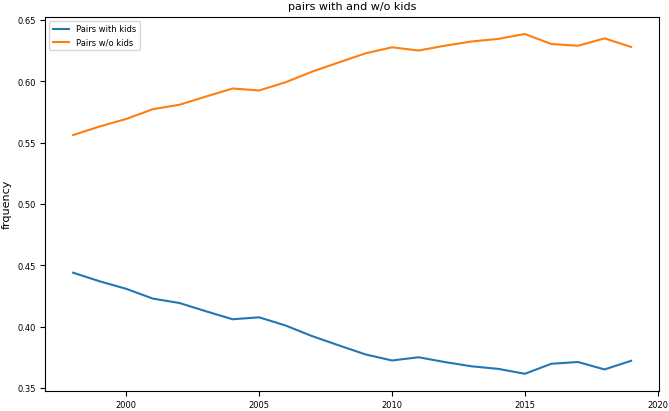

In [30]:

# total number of married pairs it given by the sum of couples with and w/o kids
total_pairs = pairs_with_kids + pairs_wo_kids

# plot to check
plt.plot(years,pairs_with_kids/total_pairs)
plt.plot(years,pairs_wo_kids/total_pairs)
plt.ylabel("frquency")
plt.legend(['Pairs with kids','Pairs w/o kids'])
plt.title("pairs with and w/o kids")

Zwei Arten von Normierung implemenetiert
was ist korrekt? 
Norm 2: pairs_with_kids/total_pairs as factor to multiply
Norm 1: 1/pairs_with_kids or 1/pairs_wo_kids as a factor to multiply

findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


22
[68574. 73427. 75014. 74401. 77530. 79487. 78456. 74363. 69478. 67426.
 67054. 63198. 63785. 61386. 57442. 53274. 52048. 50326. 49262. 46897.
 45129. 45742.]
22

pairs total:  [16914 16856 16864 16810 16784 16663 16576 16327 16157 16134 15941 15804
 15700 15305 15360 15340 15291 15336 15411 15416 15458 15381]
[0.44389263 0.43687708 0.43074004 0.42278406 0.41920877 0.41247074
 0.40594836 0.40754578 0.40081698 0.39215322 0.38466846 0.37730954
 0.37235669 0.3749755  0.37102865 0.36760104 0.36550912 0.36150235
 0.36967101 0.37110794 0.36505369 0.37208244]
[0.55610737 0.56312292 0.56925996 0.57721594 0.58079123 0.58752926
 0.59405164 0.59245422 0.59918302 0.60784678 0.61533154 0.62269046
 0.62764331 0.6250245  0.62897135 0.63239896 0.63449088 0.63849765
 0.63032899 0.62889206 0.63494631 0.62791756]


findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


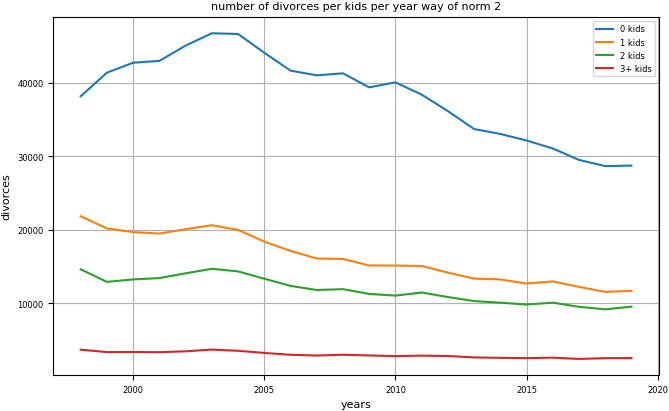

In [31]:
# to build the plot 
# sum on axis=1 meaning to sum over all durations per #kids and year
# normalise by if possible
#years = np.arange(2020,2023)
# von Datenset kommen Daten von 1997 bis 2023
# von pairs_with_wo_kids kommen Daten von 1996 bis 2019
year_max = 2019
year_min = 1998
years = range(year_min,year_max+1)
year_max_offset = 2023-year_max-2

num_durations = 20


def divorces_kids(kids):
    data = np.array([])
    for year in range(25):
        # Initialize sum before the loop
        sum_value = 0
        
        for duration in range(num_durations):
            # Calculate the sum along the third axis (axis=0) for each year and duration
            sum_value += np.sum(dataset_array[year][duration][kids])

        # Append the result to the data list
        data = np.append(data,sum_value.astype(int))
    return data
# Now, 'data' contains the sum of the first element along the third axis for each year


kid_0 = divorces_kids(0) 
kid_0 = kid_0[:-year_max_offset]
kid_0 = kid_0[1:]
#kid_0 = np.delete(kid_0,np.s_[:1])

kid_1 = divorces_kids(1)
kid_1 = kid_1[:-year_max_offset]
kid_1 = kid_1[1:]
#kid_1 = np.delete(kid_1,np.s_[:1])

kid_2 = divorces_kids(2)
kid_2 = kid_2[:-year_max_offset]
kid_2 = kid_2[1:]
#kid_2 = np.delete(kid_2,np.s_[:1])

kid_3 = divorces_kids(3)
kid_3 = kid_3[:-year_max_offset]
kid_3 = kid_3[1:]
#kid_3 = np.delete(kid_3,np.s_[:1])

# totale scheidungen einfach die Summe der scheidungen zwischen den Kindergruppen zu einem Zeitpunkt
# also Scheidungen pro Kind sind ja über die Durtations gebildet, wobei die Durations summiert werden
# jetzt dann die Scheidungen pro Kind noch summiert also über alle Kindergruppen
# damit eine Gesamtzahl an Scheidungen die in einem Jahr stattgefunden haben 


pairs_total = pairs_with_kids+pairs_wo_kids
print(np.size(kid_0))
print(kid_0)
print(np.size(pairs_total))
print('\npairs total: ',pairs_total)

# normierung
norm_wo_kids = pairs_wo_kids/pairs_total
norm_with_kids = pairs_with_kids/pairs_total
print(norm_with_kids)
print(norm_wo_kids)

# alternative normierung
# siehe nächste code region

plt.plot(years, kid_0*norm_wo_kids) # ist dir normierung so richtig?
#oder so plt.plot(years, kid_0/(pairs_wo_kids)) ??
plt.plot(years, kid_1*norm_with_kids)
plt.plot(years, kid_2*norm_with_kids)
plt.plot(years, kid_3*norm_with_kids)


# visualisation 
plt.title("number of divorces per kids per year way of norm 2")
plt.xlabel("years")
plt.ylabel("divorces")
plt.legend(["0 kids", "1 kids", "2 kids", "3+ kids"])
plt.grid()
# using y-axis log scale to better show changes on plot with three and more kids
#plt.yscale('log')
plt.show()



findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


[0.00013319 0.0001358  0.00013767 0.00014071 0.00014213 0.0001455
 0.00014861 0.00015029 0.00015442 0.00015805 0.00016308 0.0001677
 0.00017106 0.00017425 0.00017547 0.00017734 0.00017892 0.00018038
 0.00017553 0.00017479 0.00017721 0.00017473]
[0.00010632 0.00010535 0.00010417 0.00010306 0.00010259 0.00010215
 0.00010155 0.00010338 0.0001033  0.00010197 0.00010195 0.00010162
 0.00010148 0.00010454 0.00010351 0.00010308 0.00010307 0.00010212
 0.00010294 0.00010315 0.00010188 0.00010354]


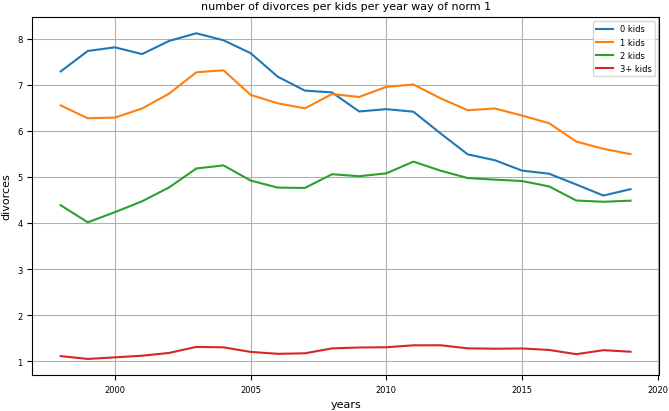

In [32]:
# normierung
norm_wo_kids = 1/pairs_wo_kids
norm_with_kids =1/pairs_with_kids
print(norm_with_kids)
print(norm_wo_kids)


plt.plot(years, kid_0*norm_wo_kids) # ist dir normierung so richtig?
#oder so plt.plot(years, kid_0/(pairs_wo_kids)) ??
plt.plot(years, kid_1*norm_with_kids)
plt.plot(years, kid_2*norm_with_kids)
plt.plot(years, kid_3*norm_with_kids)


# visualisation 
plt.title("number of divorces per kids per year way of norm 1")
plt.xlabel("years")
plt.ylabel("divorces")
plt.legend(["0 kids", "1 kids", "2 kids", "3+ kids"])
plt.grid()
# using y-axis log scale to better show changes on plot with three and more kids
#plt.yscale('log')
plt.show()


findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


[16914 16856 16864 16810 16784 16663 16576 16327 16157 16134 15941 15804
 15700 15305 15360 15340 15291 15336 15411 15416 15458 15381]
[1.33191263e-07 1.35795763e-07 1.37665198e-07 1.40706346e-07
 1.42126208e-07 1.45496872e-07 1.48610492e-07 1.50285543e-07
 1.54416306e-07 1.58052790e-07 1.63078930e-07 1.67700822e-07
 1.71057133e-07 1.74246384e-07 1.75469381e-07 1.77336407e-07
 1.78922884e-07 1.80375180e-07 1.75530981e-07 1.74794616e-07
 1.77210704e-07 1.74733531e-07]
[1.06315118e-07 1.05351875e-07 1.04166667e-07 1.03060909e-07
 1.02585146e-07 1.02145046e-07 1.01553773e-07 1.03380544e-07
 1.03295114e-07 1.01967982e-07 1.01947191e-07 1.01615689e-07
 1.01481632e-07 1.04536902e-07 1.03508954e-07 1.03082156e-07
 1.03071532e-07 1.02124183e-07 1.02944204e-07 1.03145952e-07
 1.01884870e-07 1.03541106e-07]
[0.00729045 0.00773567 0.00781396 0.00766783 0.00795343 0.0081192
 0.0079675  0.00768769 0.00717674 0.00687529 0.00683597 0.00642191
 0.00647301 0.0064171  0.00594576 0.0054916  0.00536467 0.

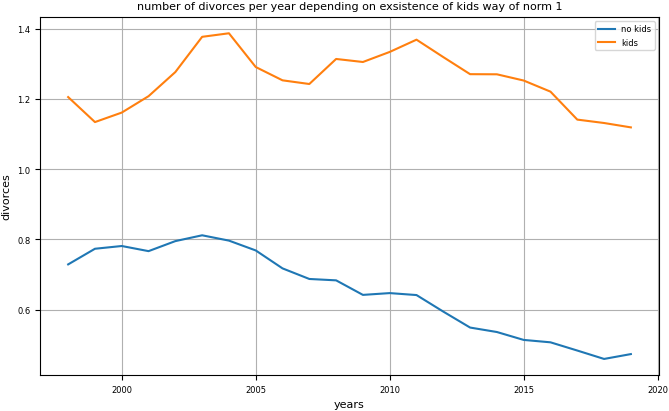

In [33]:
# da nur bekannt ob kinder oder keine kinder hier die gruppen 1 Kind, 2 Kinder, 3+ Kinder addieren
# normierung
print(pairs_total)
norm_wo_kids = 1/(pairs_wo_kids * 1000)
norm_with_kids =1/(pairs_with_kids * 1000)
print(norm_with_kids)
print(norm_wo_kids)

#scheidungen mit kinder
divorces_with_kids = kid_1 +  kid_2 + kid_3
#scheidung ohne kinder
divorces_wo_kids = kid_0

plt.plot(years, divorces_wo_kids*norm_wo_kids * 100) # ist dir normierung so richtig?
#oder so plt.plot(years, kid_0/(pairs_wo_kids)) ??
plt.plot(years, divorces_with_kids*norm_with_kids * 100)

print(divorces_wo_kids*norm_wo_kids)



# visualisation 
plt.title("number of divorces per year depending on exsistence of kids way of norm 1")
plt.xlabel("years")
plt.ylabel("divorces")
plt.legend(["no kids", "kids"])
plt.grid()
# using y-axis log scale to better show changes on plot with three and more kids
#plt.yscale('log')
plt.show()


[0.44389263 0.43687708 0.43074004 0.42278406 0.41920877 0.41247074
 0.40594836 0.40754578 0.40081698 0.39215322 0.38466846 0.37730954
 0.37235669 0.3749755  0.37102865 0.36760104 0.36550912 0.36150235
 0.36967101 0.37110794 0.36505369 0.37208244]
[0.55610737 0.56312292 0.56925996 0.57721594 0.58079123 0.58752926
 0.59405164 0.59245422 0.59918302 0.60784678 0.61533154 0.62269046
 0.62764331 0.6250245  0.62897135 0.63239896 0.63449088 0.63849765
 0.63032899 0.62889206 0.63494631 0.62791756]
array der geschiedenen mit kindern gewichtet mit anzahl paare mit kindern [40177.16613456 36493.65282392 36338.09108159 36298.9707912
 37659.61987607 39039.94340755 37893.2495777  35012.25822258
 32529.10391781 30834.61528449 30995.81556991 29370.52935966
 29040.47044586 29460.69996733 27897.64388021 26341.18794003
 25951.51324308 25104.89201878 25714.31574849 24232.60625324
 23312.69394488 23832.62440674]


findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


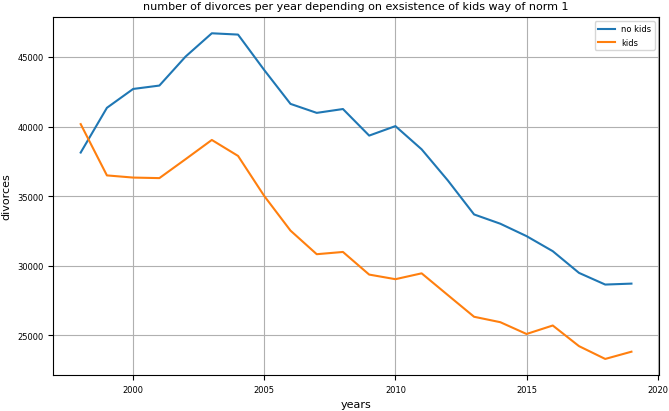

In [34]:
# Der wohl beste Ansatz
# Allerdings stimmt hier etwas nicht mit der y-Achse
# der erste Ansatz der Normierung
# da nur bekannt ob kinder oder keine kinder hier die gruppen 1 Kind, 2 Kinder, 3+ Kinder addieren
# normierung
norm_wo_kids = pairs_wo_kids/pairs_total
norm_with_kids =pairs_with_kids/pairs_total
print(norm_with_kids)
print(norm_wo_kids)


#scheidungen mit kinder
divorces_with_kids = kid_1 +  kid_2 + kid_3
#scheidung ohne kinder
divorces_wo_kids = kid_0


plt.plot(years, divorces_wo_kids*norm_wo_kids) # ist dir normierung so richtig?
#oder so plt.plot(years, kid_0/(pairs_wo_kids)) ??
plt.plot(years, divorces_with_kids*norm_with_kids)


print('array der geschiedenen mit kindern gewichtet mit anzahl paare mit kindern' ,divorces_with_kids*norm_with_kids)

# visualisation 
plt.title("number of divorces per year depending on exsistence of kids way of norm 1")
plt.xlabel("years")
plt.ylabel("divorces")
plt.legend(["no kids", "kids"])
plt.grid()
# using y-axis log scale to better show changes on plot with three and more kids
#plt.yscale('log')
plt.show()


findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


[1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011
 2012 2013 2014 2015 2016 2017 2018 2019]


findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


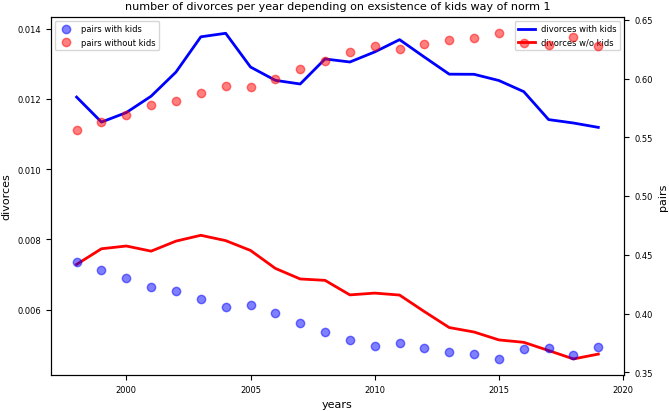

In [35]:
from matplotlib.ticker import ScalarFormatter

norm_wo_kids = 1/(pairs_wo_kids * 1000)
norm_with_kids =1/(pairs_with_kids * 1000)
years = np.arange(1998,2020)
pairs_with_kids_weighted = pairs_with_kids / total_pairs
pairs_wo_kids_weighted = pairs_wo_kids / total_pairs
print(years)

# Erste y-Achse
fig, ax1 = plt.subplots()
ax1.plot(years, divorces_with_kids*norm_with_kids,color='blue',linewidth=2)
ax1.plot(years, divorces_wo_kids*norm_wo_kids, alpha=1, color = 'red',linewidth=2) # ist dir normierung so richtig?
ax1.set_title("number of divorces per year depending on exsistence of kids way of norm 1")
ax1.set_xlabel("years")
ax1.set_ylabel("divorces")
ax1.legend(["divorces with kids", "divorces w/o kids"])
ax1.set_yscale('linear')


ax2 = ax1.twinx()
ax2.scatter(years,pairs_with_kids_weighted, alpha = 0.5, color = 'blue')
ax2.scatter(years, pairs_wo_kids_weighted, alpha = 0.5, color = 'red')
ax2.set_ylabel("pairs")
ax2.legend(["pairs with kids", "pairs without kids"])
ax2.set_yscale('linear')






plt.show()


findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


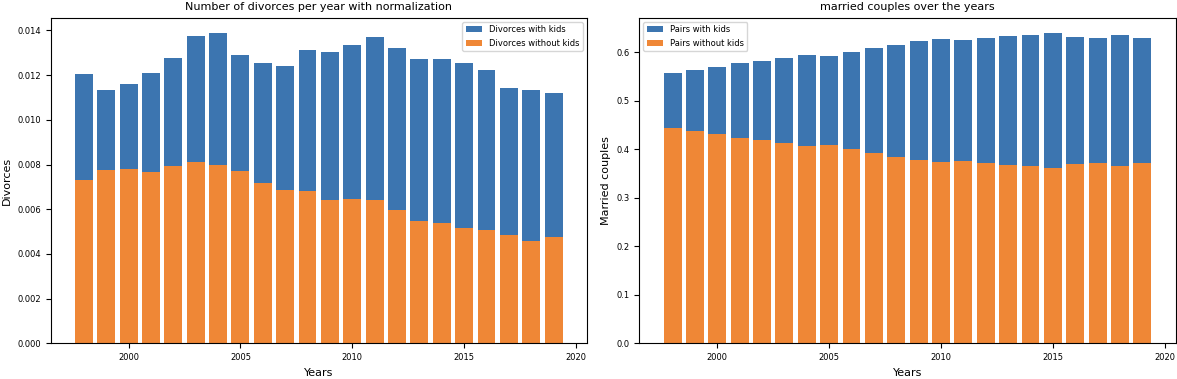

In [36]:

# Define RGB values in the range [0, 255]

color1 = np.array([239,135,54])/255 #kind of orange
color2 = np.array([60,117,176])/255 #kind of lightblue
# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))  # 1 row, 2 columns

# Plot for the first subplot
ax1.bar(years, divorces_with_kids * norm_with_kids, color=color2, linewidth=2)
ax1.bar(years, divorces_wo_kids * norm_wo_kids, alpha=1, color=color1, linewidth=2)
ax1.set_title("Number of divorces per year with normalization")
ax1.set_xlabel("Years")
ax1.set_ylabel("Divorces")
ax1.legend(["Divorces with kids", "Divorces without kids"])
ax1.set_yscale('linear')

# Plot for the second subplot
ax2.bar(years, pairs_wo_kids_weighted, alpha=1, color=color2)
ax2.bar(years, pairs_with_kids_weighted, alpha=1, color=color1)
ax2.set_title("married couples over the years")
ax2.set_xlabel("Years")
ax2.set_ylabel("Married couples")
ax2.legend(["Pairs with kids", "Pairs without kids"])
ax2.set_yscale('linear')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


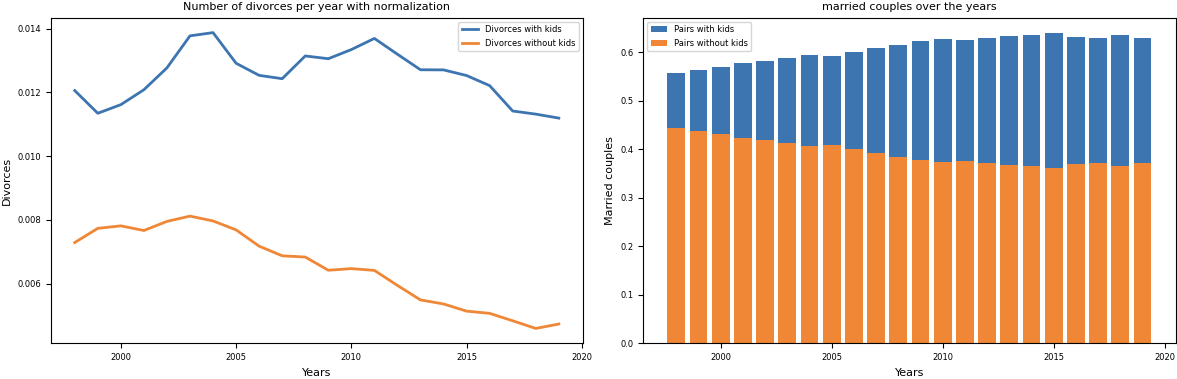

In [37]:

# Define RGB values in the range [0, 255]

color1 = np.array([239,135,54])/255 #kind of orange
color2 = np.array([60,117,176])/255 #kind of lightblue
# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))  # 1 row, 2 columns

# Plot for the first subplot
ax1.plot(years, divorces_with_kids * norm_with_kids, color=color2, linewidth=2)
ax1.plot(years, divorces_wo_kids * norm_wo_kids, alpha=1, color=color1, linewidth=2)
ax1.set_title("Number of divorces per year with normalization")
ax1.set_xlabel("Years")
ax1.set_ylabel("Divorces")
ax1.legend(["Divorces with kids", "Divorces without kids"])
ax1.set_yscale('linear')

# Plot for the second subplot
ax2.bar(years, pairs_wo_kids_weighted, alpha=1, color=color2)
ax2.bar(years, pairs_with_kids_weighted, alpha=1, color=color1)
ax2.set_title("married couples over the years")
ax2.set_xlabel("Years")
ax2.set_ylabel("Married couples")
ax2.legend(["Pairs with kids", "Pairs without kids"])
ax2.set_yscale('linear')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


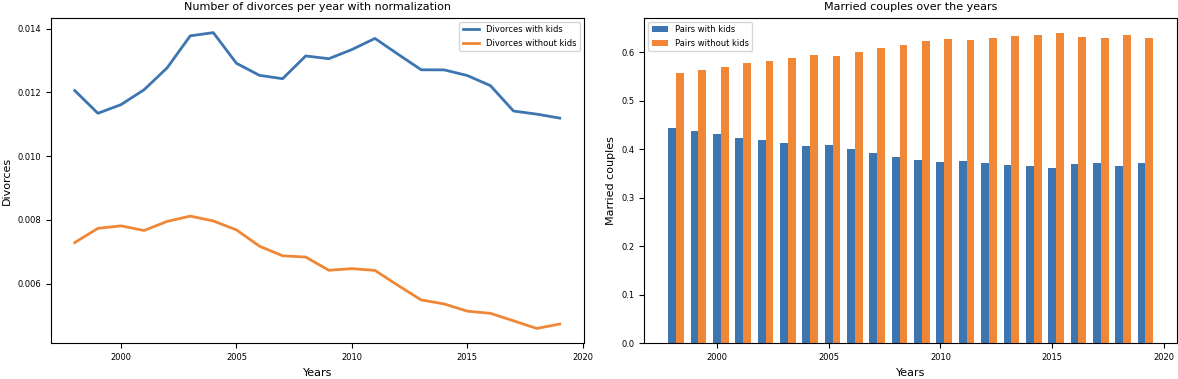

In [38]:
# Define RGB values in the range [0, 255]
color1 = np.array([239, 135, 54]) / 255  # kind of orange
color2 = np.array([60, 117, 176]) / 255  # kind of light blue

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))  # 1 row, 2 columns

# Plot for the first subplot
ax1.plot(years, divorces_with_kids * norm_with_kids, color=color2, linewidth=2)
ax1.plot(years, divorces_wo_kids * norm_wo_kids, alpha=1, color=color1, linewidth=2)
ax1.set_title("Number of divorces per year with normalization")
ax1.set_xlabel("Years")
ax1.set_ylabel("Divorces")
ax1.legend(["Divorces with kids", "Divorces without kids"])
ax1.set_yscale('linear')

# Plot for the second subplot
bar_width = 0.35  # Adjust the bar width as needed
ax2.bar(years, pairs_with_kids_weighted, width=bar_width, alpha=1, color=color2, label="Pairs with kids")
ax2.bar(np.array(years) + bar_width, pairs_wo_kids_weighted, width=bar_width, alpha=1, color=color1, label="Pairs without kids")
ax2.set_title("Married couples over the years")
ax2.set_xlabel("Years")
ax2.set_ylabel("Married couples")
ax2.legend()

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


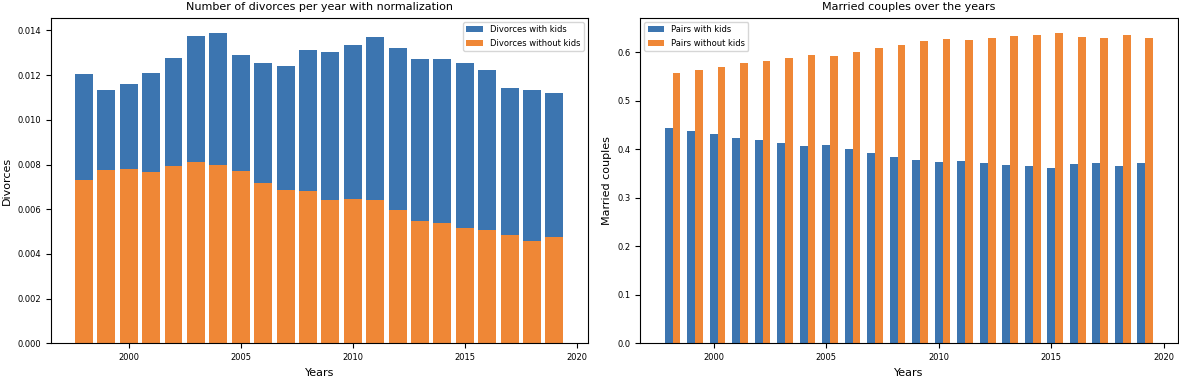

In [39]:
# Define RGB values in the range [0, 255]
color1 = np.array([239, 135, 54]) / 255  # kind of orange
color2 = np.array([60, 117, 176]) / 255  # kind of light blue

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))  # 1 row, 2 columns

# Plot for the first subplot
ax1.bar(years, divorces_with_kids * norm_with_kids, color=color2, linewidth=2)
ax1.bar(years, divorces_wo_kids * norm_wo_kids, alpha=1, color=color1, linewidth=2)
ax1.set_title("Number of divorces per year with normalization")
ax1.set_xlabel("Years")
ax1.set_ylabel("Divorces")
ax1.legend(["Divorces with kids", "Divorces without kids"])
ax1.set_yscale('linear')

# Plot for the second subplot
bar_width = 0.35  # Adjust the bar width as needed
ax2.bar(years, pairs_with_kids_weighted, width=bar_width, alpha=1, color=color2, label="Pairs with kids")
ax2.bar(np.array(years) + bar_width, pairs_wo_kids_weighted, width=bar_width, alpha=1, color=color1, label="Pairs without kids")
ax2.set_title("Married couples over the years")
ax2.set_xlabel("Years")
ax2.set_ylabel("Married couples")
ax2.legend()

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


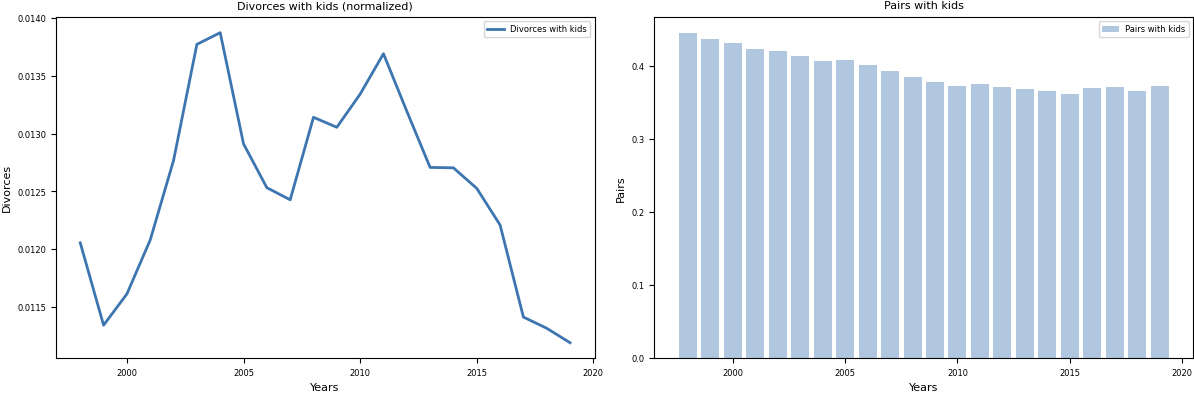

findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


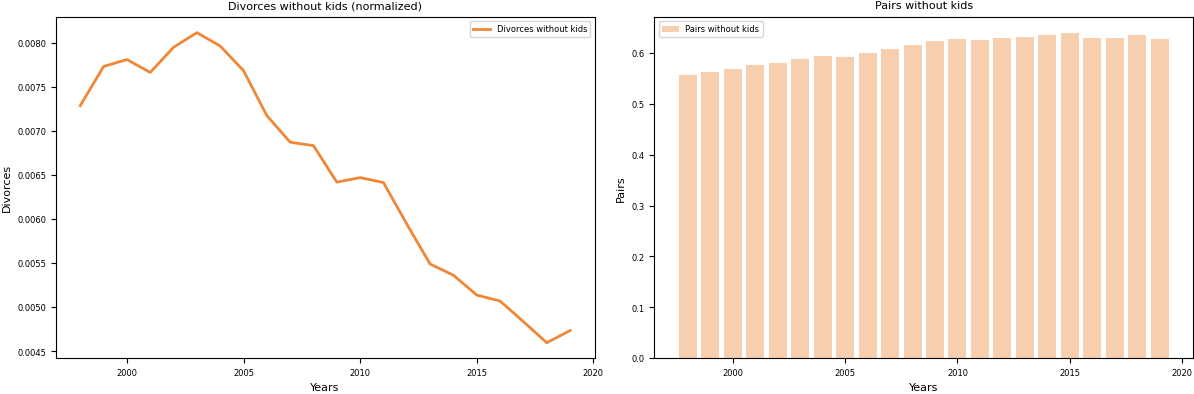

In [40]:
fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.plot(years, divorces_with_kids * norm_with_kids, color=color2, linewidth=2)
ax1.set_title("Divorces with kids (normalized)")
ax1.set_xlabel("Years")
ax1.set_ylabel("Divorces")
ax1.legend(["Divorces with kids"])
ax1.set_yscale('linear')

ax2.bar(years, pairs_with_kids_weighted, alpha=0.4, color=color2)
ax2.set_title("Pairs with kids")
ax2.set_xlabel("Years")
ax2.set_ylabel("Pairs")
ax2.legend(["Pairs with kids"])
ax2.set_yscale('linear')

# Figure 2: Divorces without kids and corresponding pairs
fig2, (ax3, ax4) = plt.subplots(1, 2, figsize=(12, 4))
ax3.plot(years, divorces_wo_kids * norm_wo_kids, color=color1, linewidth=2)
ax3.set_title("Divorces without kids (normalized)")
ax3.set_xlabel("Years")
ax3.set_ylabel("Divorces")
ax3.legend(["Divorces without kids"])
ax3.set_yscale('linear')

ax4.bar(years, pairs_wo_kids_weighted, alpha=0.4, color=color1)
ax4.set_title("Pairs without kids")
ax4.set_xlabel("Years")
ax4.set_ylabel("Pairs")
ax4.legend(["Pairs without kids"])
ax4.set_yscale('linear')

plt.show()

findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


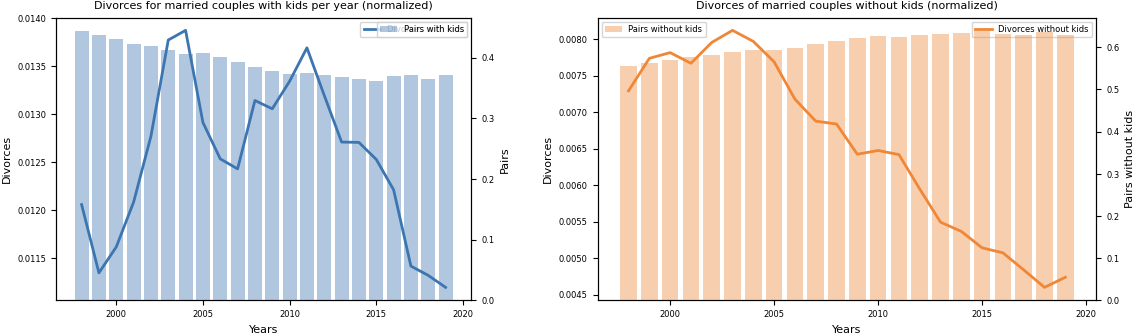

In [41]:
fig1, (ax1, ax3) = plt.subplots(1, 2, figsize=(12, 4), gridspec_kw={'width_ratios': [1, 1.2]})


ax1.plot(years, divorces_with_kids * norm_with_kids, color=color2, linewidth=2)
ax1.set_title("Divorces for married couples with kids per year (normalized)")
ax1.set_xlabel("Years")
ax1.set_ylabel("Divorces")
ax1.legend(["Divorces with kids"])
ax1.set_yscale('linear')

ax2 = ax1.twinx()
ax2.bar(years, pairs_with_kids_weighted, alpha=0.4, color=color2)
#ax2.set_title("Pairs with kids")
ax2.set_xlabel("Years")
ax2.set_ylabel("Pairs")
ax2.legend(["Pairs with kids"])
ax2.set_yscale('linear')

# Figure 2: Divorces without kids and corresponding pairs
ax3.plot(years, divorces_wo_kids * norm_wo_kids, color=color1, linewidth=2)
ax3.set_title("Divorces of married couples without kids (normalized)")
ax3.set_xlabel("Years")
ax3.set_ylabel("Divorces")
ax3.legend(["Divorces without kids"])
ax3.set_yscale('linear')

ax4 = ax3.twinx()
ax4.bar(years, pairs_wo_kids_weighted, alpha=0.4, color=color1)
#ax4.set_title("Pairs without kids")
ax4.set_xlabel("Years")
ax4.set_ylabel("Pairs without kids")
ax4.legend(["Pairs without kids"])
ax4.set_yscale('linear')

plt.tight_layout(pad=3.0)  # Adjust the pad value as needed to control the space between subplots
plt.show()

findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


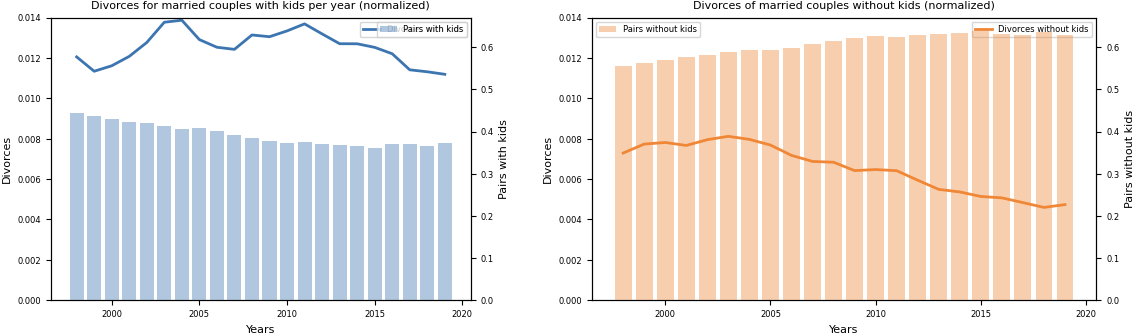

In [42]:
# Plotting
fig1, (ax1, ax3) = plt.subplots(1, 2, figsize=(12, 4), gridspec_kw={'width_ratios': [1, 1.2]})

# First subplot (Divorces with kids and Pairs with kids)
ax1.plot(years, divorces_with_kids * norm_with_kids, color=color2, linewidth=2)
ax1.set_title("Divorces for married couples with kids per year (normalized)")
ax1.set_xlabel("Years")
ax1.set_ylabel("Divorces")
ax1.legend(["Divorces with kids"])
ax1.set_yscale('linear')

ax2 = ax1.twinx()
ax2.bar(years, pairs_with_kids_weighted, alpha=0.4, color=color2)
ax2.set_xlabel("Years")
ax2.set_ylabel("Pairs with kids")
ax2.legend(["Pairs with kids"])
ax2.set_yscale('linear')

# Second subplot (Divorces without kids and Pairs without kids)
ax3.plot(years, divorces_wo_kids * norm_wo_kids, color=color1, linewidth=2)
ax3.set_title("Divorces of married couples without kids (normalized)")
ax3.set_xlabel("Years")
ax3.set_ylabel("Divorces")
ax3.legend(["Divorces without kids"])
ax3.set_yscale('linear')

ax4 = ax3.twinx()
ax4.bar(years, pairs_wo_kids_weighted, alpha=0.4, color=color1)
ax4.set_xlabel("Years")
ax4.set_ylabel("Pairs without kids")
ax4.legend(["Pairs without kids"])
ax4.set_yscale('linear')

# Set y-axis limits to be the same for both Pairs with kids and Pairs without kids
max_y = max(ax2.get_ylim()[1], ax4.get_ylim()[1])
ax2.set_ylim(0, max_y)
ax4.set_ylim(0, max_y)

# 
max_y = max(ax1.get_ylim()[1], ax3.get_ylim()[1])
ax1.set_ylim(0, max_y)
ax3.set_ylim(0, max_y)

plt.tight_layout(pad=3.0)
plt.show()

findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


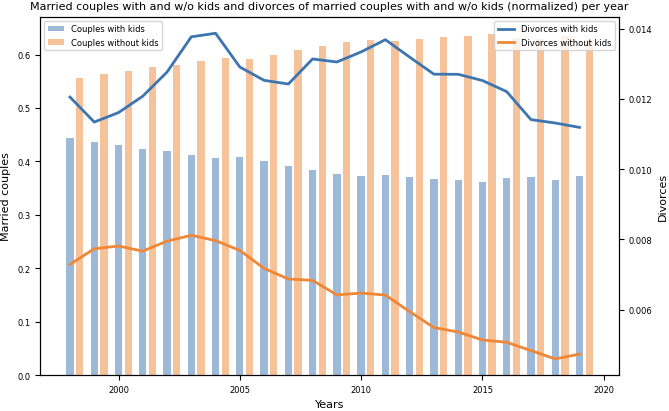

In [43]:
# Plotting
fig, ax1 = plt.subplots()
# Plot for the first subplot
bar_width = 0.3  # Adjust the bar width as needed
ax1.bar(years, pairs_with_kids_weighted, width=bar_width, alpha=0.5, color=color2, label="Couples with kids")
ax1.bar(np.array(years) + bar_width+0.1, pairs_wo_kids_weighted, width=bar_width, alpha=0.5, color=color1, label="Couples without kids")
ax1.set_xlabel("Years")
ax1.set_ylabel("Married couples")
ax1.legend()

# Plot for the second subplot
ax2 = ax1.twinx()

ax2.plot(years, divorces_with_kids * norm_with_kids, color=color2, linewidth=2)
ax2.plot(years, divorces_wo_kids * norm_wo_kids, alpha=1, color=color1, linewidth=2)
ax2.set_title("Married couples with and w/o kids and divorces of married couples with and w/o kids (normalized) per year")
ax2.set_xlabel("Years")
ax2.set_ylabel("Divorces")
ax2.legend(["Divorces with kids", "Divorces without kids"])
ax2.set_yscale('linear')



# Adjust layout and show the plots
#plt.subplots_adjust(top=1.6, bottom=0.1, left=0.1, right=1.7)  # Increase the whitespace around the plot
plt.show()

/tmp/ipykernel_11486/1948676110.py:26: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(top=1.6, bottom=0.1, left=0.1, right=1.7)  # Increase the whitespace around the plot
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


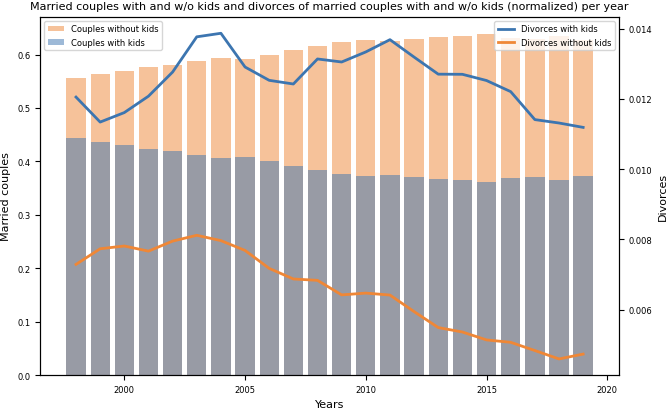

In [44]:
# Plotting
fig, ax1 = plt.subplots()
# Plot for the first subplot
#bar_width = 1  # Adjust the bar width as needed

ax1.bar(years, pairs_wo_kids_weighted, alpha=0.5, color=color1, label="Couples without kids")
ax1.bar(years, pairs_with_kids_weighted, alpha=0.5, color=color2, label="Couples with kids")
ax1.set_xlabel("Years")
ax1.set_ylabel("Married couples")
ax1.legend()

# Plot for the second subplot
ax2 = ax1.twinx()

ax2.plot(years, divorces_with_kids * norm_with_kids, color=color2, linewidth=2)
ax2.plot(years, divorces_wo_kids * norm_wo_kids, alpha=1, color=color1, linewidth=2)
ax2.set_title("Married couples with and w/o kids and divorces of married couples with and w/o kids (normalized) per year")
ax2.set_xlabel("Years")
ax2.set_ylabel("Divorces")
ax2.legend(["Divorces with kids", "Divorces without kids"])
ax2.set_yscale('linear')



# Adjust layout and show the plots
plt.subplots_adjust(top=1.6, bottom=0.1, left=0.1, right=1.7)  # Increase the whitespace around the plot
plt.show()